In [31]:
import os
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [32]:
os.chdir("C:/Users/Admin/Desktop/Python/Курс валют")
curs = pd.read_csv('curs.csv', sep=';', header=0, parse_dates=[0])

In [33]:
#curs.head() #первые 5 записей
#curs.shape  #размер матрицы
#curs.tail() #последние 5 записей
#curs.iloc[:,1].plot() #график

In [34]:
curs_2 = pd.DataFrame() 

for i in range(5,0,-1):
    curs_2['t-'+str(i)] = curs.iloc[:,1].shift(i)

curs_2['t'] = curs.iloc[:,1].values

print(curs_2.head(n=10))

       t-5      t-4      t-3      t-2      t-1        t
0      NaN      NaN      NaN      NaN      NaN  59.8961
1      NaN      NaN      NaN      NaN  59.8961  59.9533
2      NaN      NaN      NaN  59.8961  59.9533  60.1614
3      NaN      NaN  59.8961  59.9533  60.1614  59.4978
4      NaN  59.8961  59.9533  60.1614  59.4978  59.3700
5  59.8961  59.9533  60.1614  59.4978  59.3700  59.6067
6  59.9533  60.1614  59.4978  59.3700  59.6067  59.4015
7  60.1614  59.4978  59.3700  59.6067  59.4015  59.1830
8  59.4978  59.3700  59.6067  59.4015  59.1830  59.3521
9  59.3700  59.6067  59.4015  59.1830  59.3521  59.6697


In [35]:
curs_4 = curs_2[5:]
curs_4.head()

,t-5,t-4,t-3,t-2,t-1,t
5,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067
6,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015
7,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830
8,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521
9,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697


In [36]:
y = curs_4['t']
X = curs_4.drop('t', axis=1)

In [37]:
X_train = X[:200]
y_train = y[:200]
X_test  = X[200:]
y_test  = y[200:]

In [38]:
print(curs_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(463, 6)
(200, 5)
(200,)
(263, 5)
(263,)


In [39]:
#print(X_train.head())

In [40]:
#преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
#обучение нейронной сети 
model = Sequential()
model.add(Dense(10, input_dim=5, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

model.fit(X_train, y_train, epochs=25, batch_size=None)

Epoch 1/25
200/200 [==============================] - 0s 2ms/step - loss: 13969.2641 - mean_absolute_percentage_error: 203.0974
Epoch 2/25
200/200 [==============================] - 0s 74us/step - loss: 11506.4298 - mean_absolute_percentage_error: 184.3204
Epoch 3/25
200/200 [==============================] - 0s 90us/step - loss: 9319.7860 - mean_absolute_percentage_error: 165.8569
Epoch 4/25
200/200 [==============================] - 0s 95us/step - loss: 7415.6874 - mean_absolute_percentage_error: 147.9535
Epoch 5/25
200/200 [==============================] - 0s 96us/step - loss: 5792.1950 - mean_absolute_percentage_error: 130.7682
Epoch 6/25
200/200 [==============================] - 0s 100us/step - loss: 4436.4941 - mean_absolute_percentage_error: 114.4333
Epoch 7/25
200/200 [==============================] - 0s 85us/step - loss: 3331.1963 - mean_absolute_percentage_error: 99.1219
Epoch 8/25
200/200 [==============================] - 0s 95us/step - loss: 2444.6636 - mean_absolute_pe

In [43]:
predictions_train = model.predict(X_train)
predictions = model.predict(X_test)

In [44]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 5)
(200,)
(263, 5)
(263,)


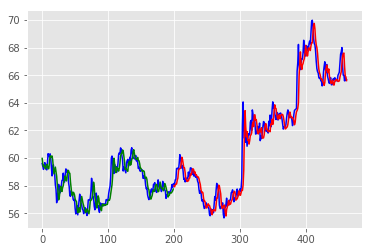

In [46]:
x2 = numpy.arange(0, 200, 1)
x3 = numpy.arange(200, 463, 1)

plt.plot(x2, y_train, color='blue')
plt.plot(x2, predictions_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, predictions, color='red')